In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
conn.commit()


In [3]:

sample_data = [
    ("Apple", 10, 2.5),
    ("Apple", 15, 2.5),
    ("Banana", 20, 1.0),
    ("Banana", 25, 1.0),
    ("Orange", 30, 1.5),
    ("Orange", 10, 1.5),
    ("Mango", 12, 3.0),
    ("Mango", 18, 3.0)
]

# Insert data into table
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [4]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print("Sales Summary:")
print(df)


Sales Summary:
  product  total_qty  revenue
0   Apple         25     62.5
1  Banana         45     45.0
2   Mango         30     90.0
3  Orange         40     60.0


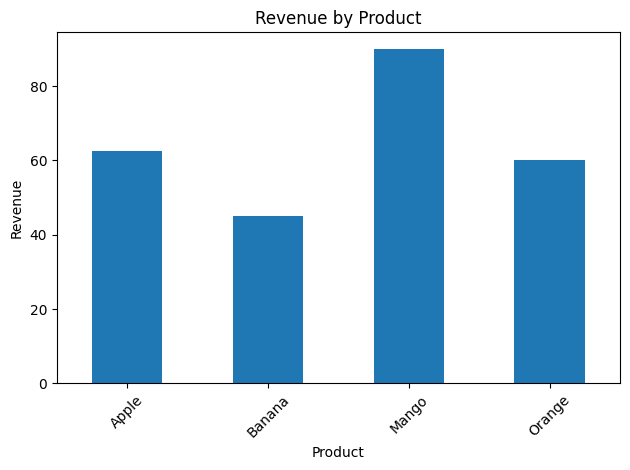

In [5]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
